In [1]:
!pip install missingno
import pandas as pd
import gc
!pip install lightgbm
!pip install xgboost

# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
member_df = pd.read_csv('train_회원정보.csv')
member_df

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,2,70대이상,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,노년생활,39
2399996,201812,TRAIN_399996,2,50대,D,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),24
2399997,201812,TRAIN_399997,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,18
2399998,201812,TRAIN_399998,1,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),27


In [5]:
bill_df = pd.read_csv('bill_청구입금정보.csv')
bill_df

,기준년월,ID,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,할인금액_청구서_B0M,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액
0,201807,TRAIN_000000,27,자동이체,미확인,당사페이앱+이메일,문자메세지,1,1,1,...,0,5,3,0,0,1,0,3,0,0
1,201807,TRAIN_000001,13,자동이체,주거지,우편,우편,1,1,1,...,163,6,3,0,0,0,0,0,0,0
2,201807,TRAIN_000002,1,자동이체,미확인,이메일,이메일,1,1,1,...,0,6,3,0,0,0,0,121,0,50
3,201807,TRAIN_000003,5,자동이체,주거지,우편,우편,1,1,1,...,0,5,3,2,0,0,0,3,0,2
4,201807,TRAIN_000004,13,자동이체,주거지,우편,우편,0,1,1,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,25,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2399996,201812,TRAIN_399996,20,자동이체,미확인,이메일,이메일,1,1,1,...,0,6,3,0,0,0,0,164,0,53
2399997,201812,TRAIN_399997,20,자동이체,회사,우편,우편,1,1,1,...,0,6,3,0,0,0,0,0,0,0
2399998,201812,TRAIN_399998,20,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 회원정보 상관계수

In [8]:
# 1. Segment를 숫자로 변환 (예: A=0, B=1, ..., E=4)
member_df['Segment_num'] = member_df['Segment'].astype('category').cat.codes

# 2. Segment_num을 제외한 수치형 컬럼 추출
numeric_cols = member_df.select_dtypes(include=['number']).columns.drop('Segment_num')

# 3. 각 수치형 변수와 Segment_num 간 상관계수 계산
correlations = member_df[numeric_cols].corrwith(member_df['Segment_num'])

# 4. 정렬 및 데이터프레임 변환
cor_df = correlations.to_frame(name='상관계수').sort_values(by='상관계수', ascending=False)

# 5. 지수 표기 없이 소수점 7자리로 출력
with pd.option_context('display.float_format', '{:.7f}'.format):
    display(cor_df)

,상관계수
입회일자_신용,0.2522895
탈회횟수_누적,0.0687440
남녀구분코드,0.0603231
마케팅동의여부,0.0477100
카드신청건수,0.0389222
...,...
이용카드수_체크_가족,NaN
이용금액_R3M_체크_가족,NaN
연회비할인카드수_B0M,NaN
할인금액_기본연회비_B0M,NaN


In [10]:
for col in ['이용카드수_체크_가족', '이용금액_R3M_체크_가족', '연회비할인카드수_B0M', '할인금액_기본연회비_B0M',
            '할인금액_제휴연회비_B0M']:
    nunique = member_df[col].nunique(dropna=True)
    missing = member_df[col].isnull().sum()
    print(f"{col} → 고유값 개수: {nunique}, 결측치 수: {missing}")

이용카드수_체크_가족 → 고유값 개수: 1, 결측치 수: 0
이용금액_R3M_체크_가족 → 고유값 개수: 1, 결측치 수: 0
연회비할인카드수_B0M → 고유값 개수: 1, 결측치 수: 0
할인금액_기본연회비_B0M → 고유값 개수: 1, 결측치 수: 0
할인금액_제휴연회비_B0M → 고유값 개수: 1, 결측치 수: 0


# 청구입금정보 상관계수

In [22]:
# 필요한 컬럼만 추출해서 df2를 준비
member_df_reduced = member_df[['ID', '기준년월', 'Segment']]

# ID와 기준년월 기준으로 병합 (inner 또는 left join 가능)
bill_df_merged = pd.merge(bill_df, member_df_reduced, on=['ID', '기준년월'], how='left')

bill_df_merged

,기준년월,ID,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,201807,TRAIN_000000,27,자동이체,미확인,당사페이앱+이메일,문자메세지,1,1,1,...,5,3,0,0,1,0,3,0,0,D
1,201807,TRAIN_000001,13,자동이체,주거지,우편,우편,1,1,1,...,6,3,0,0,0,0,0,0,0,E
2,201807,TRAIN_000002,1,자동이체,미확인,이메일,이메일,1,1,1,...,6,3,0,0,0,0,121,0,50,C
3,201807,TRAIN_000003,5,자동이체,주거지,우편,우편,1,1,1,...,5,3,2,0,0,0,3,0,2,D
4,201807,TRAIN_000004,13,자동이체,주거지,우편,우편,0,1,1,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,25,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,TRAIN_399996,20,자동이체,미확인,이메일,이메일,1,1,1,...,6,3,0,0,0,0,164,0,53,D
2399997,201812,TRAIN_399997,20,자동이체,회사,우편,우편,1,1,1,...,6,3,0,0,0,0,0,0,0,C
2399998,201812,TRAIN_399998,20,자동이체,주거지,우편,우편,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [24]:
# 1. Segment를 숫자로 변환 (예: A=0, B=1, ..., E=4)
bill_df_merged['Segment_num'] = bill_df_merged['Segment'].astype('category').cat.codes

# 2. Segment_num을 제외한 수치형 컬럼 추출
numeric_cols = bill_df_merged.select_dtypes(include=['number']).columns.drop('Segment_num')

# 3. 각 수치형 변수와 Segment_num 간 상관계수 계산
correlations = bill_df_merged[numeric_cols].corrwith(bill_df_merged['Segment_num'])

# 4. 정렬 및 데이터프레임 변환
cor_df = correlations.to_frame(name='상관계수').sort_values(by='상관계수', ascending=False)

# 5. 지수 표기 없이 소수점 7자리로 출력
with pd.option_context('display.float_format', '{:.7f}'.format):
    display(cor_df)

,상관계수
대표결제일,0.0036464
포인트_잔여포인트_B0M,0.0025841
기준년월,-0.0000000
연체건수_R3M,-0.0548139
연체건수_R6M,-0.0605037
포인트_포인트_월적립_B0M,-0.1156051
포인트_포인트_월적립_R3M,-0.1256698
상환개월수_결제일_R3M,-0.1334154
포인트_이용포인트_R12M,-0.1432407
포인트_포인트_건별_B0M,-0.1445468


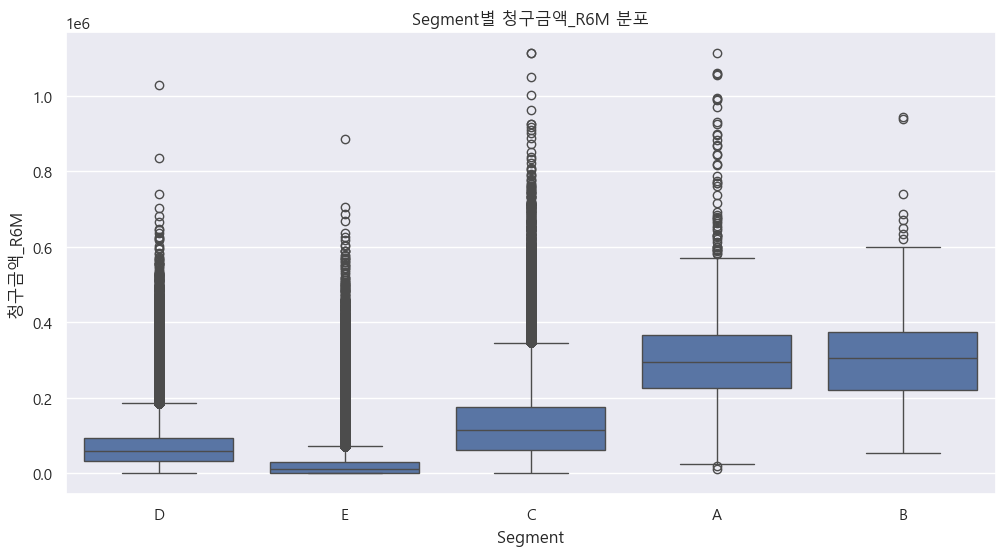

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Segment', y='청구금액_R6M', data=bill_df_merged)
plt.title('Segment별 청구금액_R6M 분포')
plt.show()

<Axes: xlabel='Segment', ylabel='청구금액_R6M'>

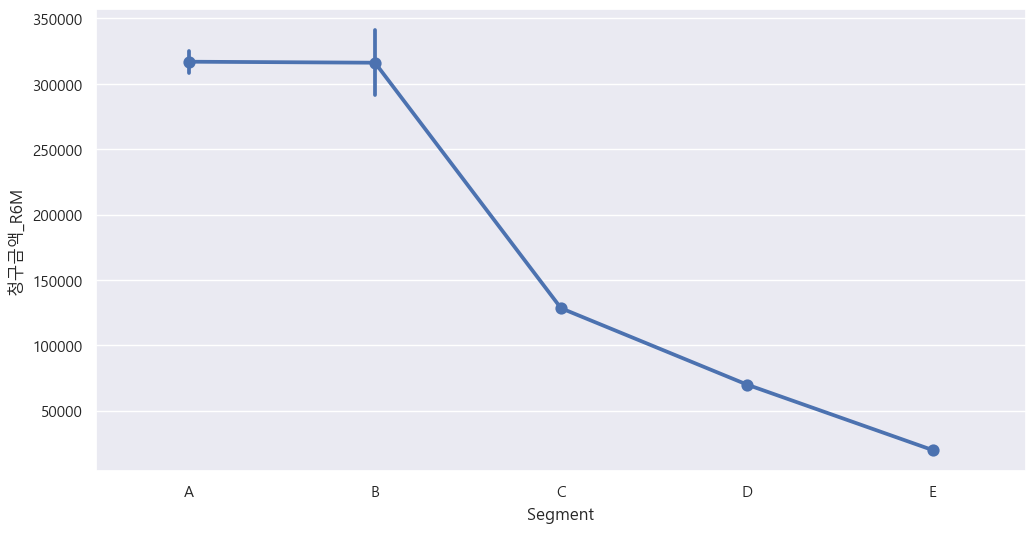

In [30]:
sns.pointplot(
    x='Segment', y='청구금액_R6M',
    data=bill_df_merged,
    order=['A', 'B', 'C', 'D', 'E']
)

In [34]:
# 범주형 컬럼 → 숫자로 변환 data encoding

import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = bill_df_merged.copy()

# 1. Segment 문자 → 숫자
df['Segment_num'] = df['Segment'].astype('category').cat.codes

# 2. Label Encoding할 범주형 컬럼 찾기
cat_cols = df.select_dtypes(include=['object', 'category']).columns.drop('Segment')

# 3. 각 범주형 컬럼 → 숫자로 변환
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# 4. 모든 수치형 컬럼 선택
numeric_cols = df.select_dtypes(include=['number']).columns

# 5. 상관계수 계산 (Segment_num 기준)
cor_df = df[numeric_cols].corrwith(df['Segment_num']).to_frame(name='상관계수')
cor_df = cor_df.drop(index='Segment_num').sort_values(by='상관계수', ascending=False)

# 6. 소수점 6자리로 출력
with pd.option_context('display.float_format', '{:.6f}'.format):
    display(cor_df)

,상관계수
할인건수_B0M,0.091973
대표청구지고객주소구분코드,0.068183
할인건수_R3M,0.059317
대표결제일,0.003646
포인트_잔여포인트_B0M,0.002584
ID,0.001218
기준년월,-0.000000
대표청구서수령지구분코드,-0.018055
청구서수령방법,-0.025964
연체건수_R3M,-0.054814


In [36]:
for col in ['대표결제방법코드']:
    nunique = bill_df_merged[col].nunique(dropna=True)
    missing = bill_df_merged[col].isnull().sum()
    print(f"{col} → 고유값 개수: {nunique}, 결측치 수: {missing}")

대표결제방법코드 → 고유값 개수: 1, 결측치 수: 0
